This notebook is originally derived from [this notebook on Kaggle](https://www.kaggle.com/kkanda/analyzing-uci-crime-and-communities-dfset).

In [1]:
# {{NO LUX}}
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import re
import json
from pandas.io.json import json_normalize

In [2]:
numPoints=100

In [3]:
# {{NO LUX}}
df = pd.read_csv("../../../data/communities_100k.csv",na_values=["?"]) 
df = df.sample(n=int(numPoints),random_state=111)

In [4]:
# {{NO LUX}}
df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPo'],
      dtype='object', length=128)

In [5]:
# {{PRINT SERIES}}
df.ViolentCrimesPerPo

92509    0.07
99094    0.27
78961    0.19
13302    0.14
67956    0.04
         ... 
16309    0.31
67571    0.14
9444     0.04
832      0.31
56392    0.00
Name: ViolentCrimesPerPo, Length: 100, dtype: float64

In [6]:
# {{PRINT DF}}
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPo
92509,55,139.0,55750.0,Neenahcity,7,0.02,0.40,0.00,0.98,0.06,...,0.02,0.26,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.07
99094,6,NaN,NaN,Marinacity,2,0.03,0.80,0.37,0.29,1.00,...,0.02,0.25,0.11,NaN,NaN,NaN,NaN,0.0,NaN,0.27
78961,39,NaN,NaN,VanWertcity,2,0.00,0.35,0.03,0.95,0.02,...,0.01,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.19
13302,6,NaN,NaN,Atascaderocity,9,0.02,0.48,0.02,0.91,0.07,...,0.07,0.08,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.14
67956,42,129.0,58880.0,Penntownship,9,0.01,0.57,0.01,0.99,0.02,...,0.09,0.04,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,53,NaN,NaN,Kelsocity,8,0.00,0.39,0.01,0.92,0.07,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31
67571,39,143.0,28826.0,Fremontcity,7,0.01,0.44,0.15,0.80,0.01,...,0.02,0.24,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.14
9444,34,3.0,30420.0,HasbrouckHeightsborough,2,0.00,0.43,0.02,0.92,0.23,...,0.00,0.64,0.54,NaN,NaN,NaN,NaN,0.0,NaN,0.04
832,48,NaN,NaN,Snydercity,9,0.00,0.50,0.08,0.61,0.01,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31


In [7]:
# {{NO LUX}}
df = df.rename(columns={'Êcommunityname':'communityName'})

In [8]:
# {{PRINT DF}}
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPo
92509,55,139.0,55750.0,Neenahcity,7,0.02,0.40,0.00,0.98,0.06,...,0.02,0.26,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.07
99094,6,NaN,NaN,Marinacity,2,0.03,0.80,0.37,0.29,1.00,...,0.02,0.25,0.11,NaN,NaN,NaN,NaN,0.0,NaN,0.27
78961,39,NaN,NaN,VanWertcity,2,0.00,0.35,0.03,0.95,0.02,...,0.01,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.19
13302,6,NaN,NaN,Atascaderocity,9,0.02,0.48,0.02,0.91,0.07,...,0.07,0.08,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.14
67956,42,129.0,58880.0,Penntownship,9,0.01,0.57,0.01,0.99,0.02,...,0.09,0.04,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,53,NaN,NaN,Kelsocity,8,0.00,0.39,0.01,0.92,0.07,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31
67571,39,143.0,28826.0,Fremontcity,7,0.01,0.44,0.15,0.80,0.01,...,0.02,0.24,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.14
9444,34,3.0,30420.0,HasbrouckHeightsborough,2,0.00,0.43,0.02,0.92,0.23,...,0.00,0.64,0.54,NaN,NaN,NaN,NaN,0.0,NaN,0.04
832,48,NaN,NaN,Snydercity,9,0.00,0.50,0.08,0.61,0.01,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31


In [9]:
# {{PRINT SERIES}}
df.communityname

92509                 Neenahcity
99094                 Marinacity
78961                VanWertcity
13302             Atascaderocity
67956               Penntownship
                  ...           
16309                  Kelsocity
67571                Fremontcity
9444     HasbrouckHeightsborough
832                   Snydercity
56392                 Warrentown
Name: communityname, Length: 100, dtype: object

In [10]:
# {{NO LUX}}
print (list(df.columns))

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [11]:
# {{NO LUX}}
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 92509 to 56392
Columns: 128 entries, state to ViolentCrimesPerPo
dtypes: float64(125), int64(2), object(1)
memory usage: 100.8+ KB


In [12]:
# {{NO LUX}}
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','ViolentCrimesPerPo']
df.fillna(df[cols].median(),inplace=True)

In [13]:
# {{PRINT DF}}
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPo
92509,55,139.0,55750.0,Neenahcity,7,0.02,0.40,0.00,0.98,0.06,...,0.02,0.26,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.07
99094,6,NaN,NaN,Marinacity,2,0.03,0.80,0.37,0.29,1.00,...,0.02,0.25,0.11,NaN,NaN,NaN,NaN,0.0,NaN,0.27
78961,39,NaN,NaN,VanWertcity,2,0.00,0.35,0.03,0.95,0.02,...,0.01,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.19
13302,6,NaN,NaN,Atascaderocity,9,0.02,0.48,0.02,0.91,0.07,...,0.07,0.08,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.14
67956,42,129.0,58880.0,Penntownship,9,0.01,0.57,0.01,0.99,0.02,...,0.09,0.04,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,53,NaN,NaN,Kelsocity,8,0.00,0.39,0.01,0.92,0.07,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31
67571,39,143.0,28826.0,Fremontcity,7,0.01,0.44,0.15,0.80,0.01,...,0.02,0.24,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.14
9444,34,3.0,30420.0,HasbrouckHeightsborough,2,0.00,0.43,0.02,0.92,0.23,...,0.00,0.64,0.54,NaN,NaN,NaN,NaN,0.0,NaN,0.04
832,48,NaN,NaN,Snydercity,9,0.00,0.50,0.08,0.61,0.01,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31


In [14]:
# {{NO LUX}}
df_state = df.groupby('state').agg({'ViolentCrimesPerPo':'mean'})[['ViolentCrimesPerPo']].reset_index()

In [15]:
# {{PRINT DF}}
df_state

,state,ViolentCrimesPerPo
0,1,0.430000
1,4,0.080000
2,5,0.360000
3,6,0.242500
4,8,0.130000
5,9,0.135000
6,12,0.523750
7,13,0.615000
8,18,0.090000
9,21,0.270000


In [16]:
# {{NO LUX}}
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPo','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
df_study = df.filter(cols, axis=1)

In [17]:
# {{PRINT DF}}
df_study

,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,PctUnemployed,PctEmploy,ViolentCrimesPerPo
92509,0.01,0.93,0.61,0.10,0.45,0.24,0.57,0.07
99094,0.02,0.85,0.17,0.04,0.00,0.17,0.79,0.27
78961,0.02,0.71,0.67,0.13,0.63,0.34,0.48,0.19
13302,0.02,0.84,0.56,0.08,0.28,0.21,0.62,0.14
67956,0.01,0.92,0.93,0.15,0.82,0.35,0.47,0.04
...,...,...,...,...,...,...,...,...
16309,0.01,0.82,0.42,0.49,0.53,0.69,0.31,0.31
67571,0.02,0.82,0.52,0.15,0.44,0.68,0.39,0.14
9444,0.01,0.90,0.65,0.00,0.27,0.25,0.54,0.04
832,0.04,0.32,0.66,0.23,0.69,0.51,0.35,0.31


In [18]:
# {{NO LUX}}
corr_df_study = df_study.corr()

In [19]:
# {{PRINT DF}}
corr_df_study

,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,PctUnemployed,PctEmploy,ViolentCrimesPerPo
HousVacant,1.000000,-0.547417,-0.332755,0.084710,-0.204422,0.135744,-0.108177,0.428747
PctHousOccup,-0.547417,1.000000,0.299532,-0.115710,-0.060381,-0.247083,0.395495,-0.429445
PctHousOwnOcc,-0.332755,0.299532,1.000000,-0.192004,0.361043,-0.379305,0.161268,-0.474623
PctVacantBoarded,0.084710,-0.115710,-0.192004,1.000000,0.304922,0.556042,-0.371268,0.361947
PctVacMore6Mos,-0.204422,-0.060381,0.361043,0.304922,1.000000,0.151039,-0.205118,-0.167501
PctUnemployed,0.135744,-0.247083,-0.379305,0.556042,0.151039,1.000000,-0.694128,0.496061
PctEmploy,-0.108177,0.395495,0.161268,-0.371268,-0.205118,-0.694128,1.000000,-0.354576
ViolentCrimesPerPo,0.428747,-0.429445,-0.474623,0.361947,-0.167501,0.496061,-0.354576,1.000000


The latter half of this notebook is originally derived from [this notebook](https://github.com/vbordalo/Communities-Crime/blob/master/Crime_v1.ipynb).

In [20]:
# {{NO LUX}}
df = df.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)

In [21]:
# {{PRINT DF}}
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPo
92509,0.02,0.40,0.00,0.98,0.06,0.02,0.35,0.44,0.23,0.37,...,0.02,0.26,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.07
99094,0.03,0.80,0.37,0.29,1.00,0.20,0.51,0.76,0.54,0.10,...,0.02,0.25,0.11,NaN,NaN,NaN,NaN,0.0,NaN,0.27
78961,0.00,0.35,0.03,0.95,0.02,0.04,0.39,0.42,0.25,0.54,...,0.01,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.19
13302,0.02,0.48,0.02,0.91,0.07,0.16,0.38,0.41,0.23,0.35,...,0.07,0.08,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.14
67956,0.01,0.57,0.01,0.99,0.02,0.00,0.42,0.36,0.23,0.40,...,0.09,0.04,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,0.00,0.39,0.01,0.92,0.07,0.06,0.47,0.51,0.34,0.39,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31
67571,0.01,0.44,0.15,0.80,0.01,0.17,0.45,0.50,0.30,0.45,...,0.02,0.24,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.14
9444,0.00,0.43,0.02,0.92,0.23,0.08,0.27,0.36,0.23,0.59,...,0.00,0.64,0.54,NaN,NaN,NaN,NaN,0.0,NaN,0.04
832,0.00,0.50,0.08,0.61,0.01,0.51,0.49,0.46,0.30,0.44,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31


In [22]:
# {{NO LUX}}
df = df.replace('?', np.nan)
feat_miss = df.columns[df.isnull().any()]

In [23]:
# {{NO LUX}}
print(feat_miss)
feat_miss.shape

Index(['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(22,)

In [24]:
# {{PRINT DF}}
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPo
92509,0.02,0.40,0.00,0.98,0.06,0.02,0.35,0.44,0.23,0.37,...,0.02,0.26,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.07
99094,0.03,0.80,0.37,0.29,1.00,0.20,0.51,0.76,0.54,0.10,...,0.02,0.25,0.11,NaN,NaN,NaN,NaN,0.0,NaN,0.27
78961,0.00,0.35,0.03,0.95,0.02,0.04,0.39,0.42,0.25,0.54,...,0.01,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.19
13302,0.02,0.48,0.02,0.91,0.07,0.16,0.38,0.41,0.23,0.35,...,0.07,0.08,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.14
67956,0.01,0.57,0.01,0.99,0.02,0.00,0.42,0.36,0.23,0.40,...,0.09,0.04,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,0.00,0.39,0.01,0.92,0.07,0.06,0.47,0.51,0.34,0.39,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31
67571,0.01,0.44,0.15,0.80,0.01,0.17,0.45,0.50,0.30,0.45,...,0.02,0.24,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.14
9444,0.00,0.43,0.02,0.92,0.23,0.08,0.27,0.36,0.23,0.59,...,0.00,0.64,0.54,NaN,NaN,NaN,NaN,0.0,NaN,0.04
832,0.00,0.50,0.08,0.61,0.01,0.51,0.49,0.46,0.30,0.44,...,0.02,0.13,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.31


In [25]:
# {{PRINT DF}}
df[feat_miss[13:23]].describe()

,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.182500,0.056667,0.542500,0.284167,0.156667,0.050833,0.758333,0.541667,0.188333
std,0.151365,0.069588,0.202176,0.283692,0.267287,0.050174,0.103118,0.396481,0.092622
min,0.000000,0.010000,0.290000,0.040000,0.000000,0.020000,0.540000,0.000000,0.070000
25%,0.077500,0.020000,0.360000,0.100000,0.045000,0.020000,0.707500,0.375000,0.130000
50%,0.155000,0.030000,0.535000,0.150000,0.065000,0.020000,0.785000,0.500000,0.150000
75%,0.260000,0.057500,0.640000,0.362500,0.135000,0.062500,0.827500,1.000000,0.255000
max,0.500000,0.260000,0.930000,1.000000,0.980000,0.170000,0.880000,1.000000,0.400000


In [26]:
# {{NO LUX}}
df = df.dropna(axis=1)

In [27]:
# {{PRINT DF}}
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPo
92509,0.02,0.40,0.00,0.98,0.06,0.02,0.35,0.44,0.23,0.37,...,0.06,0.85,0.61,0.72,0.85,0.02,0.26,0.03,0.0,0.07
99094,0.03,0.80,0.37,0.29,1.00,0.20,0.51,0.76,0.54,0.10,...,0.54,0.17,0.11,0.03,0.00,0.02,0.25,0.11,0.0,0.27
78961,0.00,0.35,0.03,0.95,0.02,0.04,0.39,0.42,0.25,0.54,...,0.01,0.81,0.66,0.79,0.79,0.01,0.18,0.01,0.0,0.19
13302,0.02,0.48,0.02,0.91,0.07,0.16,0.38,0.41,0.23,0.35,...,0.10,0.65,0.36,0.58,0.84,0.07,0.08,0.01,0.0,0.14
67956,0.01,0.57,0.01,0.99,0.02,0.00,0.42,0.36,0.23,0.40,...,0.03,0.95,0.91,0.80,0.92,0.09,0.04,0.03,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,0.00,0.39,0.01,0.92,0.07,0.06,0.47,0.51,0.34,0.39,...,0.09,0.52,0.45,0.65,0.61,0.02,0.13,0.02,0.0,0.31
67571,0.01,0.44,0.15,0.80,0.01,0.17,0.45,0.50,0.30,0.45,...,0.03,0.85,0.66,0.82,0.82,0.02,0.24,0.03,0.0,0.14
9444,0.00,0.43,0.02,0.92,0.23,0.08,0.27,0.36,0.23,0.59,...,0.34,0.66,0.86,0.84,0.82,0.00,0.64,0.54,0.0,0.04
832,0.00,0.50,0.08,0.61,0.01,0.51,0.49,0.46,0.30,0.44,...,0.08,0.88,0.55,0.65,0.89,0.02,0.13,0.02,0.0,0.31


In [28]:
# {{PRINT DF}}
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.037600,0.482400,0.140600,0.789700,0.148500,0.139000,0.417800,0.477900,0.318400,0.419100,...,0.218800,0.589600,0.536300,0.617800,0.635000,0.049700,0.219900,0.155800,0.074300,0.202600
std,0.063391,0.182137,0.230502,0.229173,0.184738,0.240918,0.162621,0.149148,0.169144,0.187083,...,0.226249,0.212978,0.189191,0.211204,0.217815,0.050681,0.178888,0.239081,0.216666,0.218958
min,0.000000,0.090000,0.000000,0.000000,0.010000,0.000000,0.070000,0.250000,0.110000,0.080000,...,0.000000,0.020000,0.110000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
25%,0.010000,0.367500,0.010000,0.717500,0.030000,0.020000,0.307500,0.387500,0.230000,0.267500,...,0.050000,0.480000,0.390000,0.517500,0.537500,0.020000,0.110000,0.020000,0.000000,0.060000
50%,0.020000,0.450000,0.030000,0.880000,0.070000,0.040000,0.400000,0.450000,0.270000,0.405000,...,0.135000,0.565000,0.545000,0.650000,0.690000,0.030000,0.170000,0.060000,0.000000,0.120000
75%,0.032500,0.560000,0.132500,0.950000,0.177500,0.122500,0.470000,0.530000,0.340000,0.530000,...,0.305000,0.772500,0.670000,0.780000,0.790000,0.062500,0.275000,0.152500,0.000000,0.270000
max,0.460000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950000,...,1.000000,0.950000,0.920000,0.920000,0.920000,0.310000,1.000000,1.000000,1.000000,1.000000


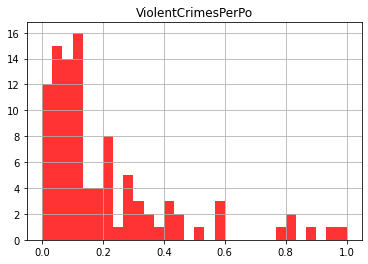

In [29]:
# {{NO LUX}}
df.hist(column = ['ViolentCrimesPerPo'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

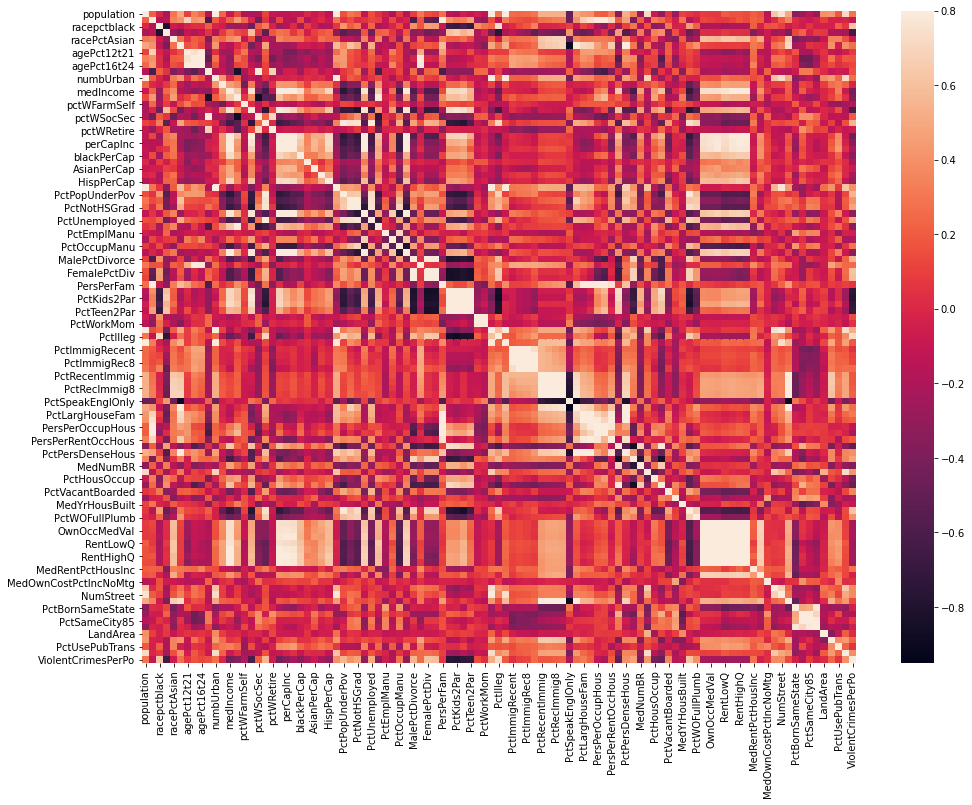

In [30]:
# {{NO LUX}}
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [31]:
# {{NO LUX}}
corrT = df.corr(method = 'pearson').round(4)

In [32]:
# {{PRINT DF}}
corrT

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPo
population,1.0000,0.2188,-0.0048,-0.2265,0.3007,0.4899,0.1046,0.3362,0.2463,-0.1675,...,0.4934,-0.3390,-0.2737,-0.1396,-0.3073,0.4025,0.4217,0.1899,0.7212,0.2937
householdsize,0.2188,1.0000,-0.1860,-0.1358,0.3417,0.4061,0.6796,0.4098,0.4451,-0.6002,...,0.3493,0.0152,-0.0550,-0.0920,-0.0204,0.0911,-0.0255,-0.0349,-0.0108,-0.1083
racepctblack,-0.0048,-0.1860,1.0000,-0.8013,-0.0718,-0.1145,-0.0100,0.0295,0.0225,0.2112,...,-0.0619,0.0058,-0.0646,0.0524,-0.0459,-0.0377,-0.0406,0.2073,0.0723,0.6245
racePctWhite,-0.2265,-0.1358,-0.8013,1.0000,-0.3030,-0.4142,-0.1150,-0.1863,-0.1157,0.0494,...,-0.3922,0.1233,0.2199,-0.0144,0.0880,0.0721,-0.1911,-0.1998,-0.2396,-0.6458
racePctAsian,0.3007,0.3417,-0.0718,-0.3030,1.0000,0.2776,0.0422,0.1998,0.1513,-0.3773,...,0.6620,-0.4222,-0.3134,-0.2917,-0.3306,-0.1021,0.3458,0.3467,0.1554,-0.0716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LandArea,0.4025,0.0911,-0.0377,0.0721,-0.1021,0.0070,0.0508,0.0237,0.0540,0.0096,...,0.0088,-0.2021,-0.1785,-0.2016,-0.2637,1.0000,-0.3530,-0.1046,0.2014,0.0141
PopDens,0.4217,-0.0255,-0.0406,-0.1911,0.3458,0.4084,-0.0974,0.2758,0.1309,-0.1054,...,0.5208,-0.2553,-0.0766,0.0116,-0.1529,-0.3530,1.0000,0.3817,0.4385,0.2284
PctUsePubTrans,0.1899,-0.0349,0.2073,-0.1998,0.3467,-0.0453,-0.1424,0.0617,0.0298,-0.0607,...,0.2747,-0.2477,0.1332,-0.0803,-0.1720,-0.1046,0.3817,1.0000,0.2230,0.0492
LemasPctOfficDrugUn,0.7212,-0.0108,0.0723,-0.2396,0.1554,0.4030,-0.0584,0.1876,0.0770,-0.0859,...,0.4194,-0.2945,-0.1889,-0.0821,-0.2582,0.2014,0.4385,0.2230,1.0000,0.3932


In [33]:
# {{NO LUX}}
corrT = corrT.sort_values(by=['ViolentCrimesPerPo'])

In [34]:
# {{PRINT DF}}
corrT

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPo
PctKids2Par,-0.1950,0.3272,-0.6852,0.6579,0.1941,-0.2293,-0.0148,-0.1809,-0.1078,-0.3083,...,-0.0117,-0.0189,0.1976,-0.0992,0.0030,0.0682,-0.1713,0.0186,-0.2712,-0.7741
PctFam2Par,-0.1307,0.4005,-0.6559,0.5999,0.2085,-0.1541,0.0014,-0.1874,-0.1107,-0.3143,...,0.0459,-0.0366,0.2234,-0.0672,0.0095,0.1034,-0.1731,0.0226,-0.2425,-0.7477
PctYoungKids2Par,-0.0610,0.3342,-0.6027,0.5488,0.2652,-0.1407,-0.0552,-0.1237,-0.0891,-0.3151,...,0.1093,-0.1602,0.1390,-0.1425,-0.0954,0.0964,-0.0380,0.1120,-0.1629,-0.7246
PctTeen2Par,-0.1109,0.4519,-0.6951,0.6205,0.1424,-0.1178,0.1459,-0.0803,0.0108,-0.3269,...,0.0138,0.0970,0.2176,-0.0504,0.1132,0.0852,-0.1962,-0.0628,-0.2552,-0.7090
racePctWhite,-0.2265,-0.1358,-0.8013,1.0000,-0.3030,-0.4142,-0.1150,-0.1863,-0.1157,0.0494,...,-0.3922,0.1233,0.2199,-0.0144,0.0880,0.0721,-0.1911,-0.1998,-0.2396,-0.6458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FemalePctDiv,0.1484,-0.4993,0.4561,-0.4513,-0.1327,0.2012,-0.2374,0.0137,-0.1290,0.2157,...,-0.0291,-0.0804,-0.2843,0.0636,-0.0275,-0.0856,0.1597,-0.0641,0.2618,0.6121
PctHousNoPhone,0.0678,-0.1782,0.4460,-0.4742,-0.3037,0.2862,0.1330,0.1113,0.0764,0.2074,...,-0.1304,0.2037,-0.1355,0.1410,0.1279,-0.0739,-0.0541,-0.2049,0.1333,0.6198
racepctblack,-0.0048,-0.1860,1.0000,-0.8013,-0.0718,-0.1145,-0.0100,0.0295,0.0225,0.2112,...,-0.0619,0.0058,-0.0646,0.0524,-0.0459,-0.0377,-0.0406,0.2073,0.0723,0.6245
PctIlleg,0.2924,-0.1241,0.7351,-0.7493,-0.0598,0.2678,0.0839,0.2538,0.1598,0.0869,...,0.1379,-0.0160,-0.1912,0.0236,-0.0832,-0.0230,0.2122,0.1613,0.3816,0.7312


In [35]:
# {{PRINT SERIES}}
corrT['ViolentCrimesPerPo']

PctKids2Par          -0.7741
PctFam2Par           -0.7477
PctYoungKids2Par     -0.7246
PctTeen2Par          -0.7090
racePctWhite         -0.6458
                       ...  
FemalePctDiv          0.6121
PctHousNoPhone        0.6198
racepctblack          0.6245
PctIlleg              0.7312
ViolentCrimesPerPo    1.0000
Name: ViolentCrimesPerPo, Length: 101, dtype: float64

In [36]:
# {{NO LUX}}
X = df.iloc[:, 0:100].values
y = df["ViolentCrimesPerPo"]

In [37]:
# {{PRINT SERIES}}
y

92509    0.07
99094    0.27
78961    0.19
13302    0.14
67956    0.04
         ... 
16309    0.31
67571    0.14
9444     0.04
832      0.31
56392    0.00
Name: ViolentCrimesPerPo, Length: 100, dtype: float64

In [38]:
# {{NO LUX}}
from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)
X_train

array([[0.09, 0.33, 0.1 , ..., 0.17, 0.04, 0.  ],
       [0.03, 0.72, 0.05, ..., 0.16, 0.  , 0.  ],
       [0.03, 0.54, 0.01, ..., 0.1 , 0.07, 0.  ],
       ...,
       [0.  , 0.53, 0.04, ..., 0.33, 0.76, 0.  ],
       [0.  , 0.45, 1.  , ..., 0.3 , 0.15, 0.  ],
       [0.02, 0.66, 0.02, ..., 0.33, 0.67, 0.  ]])

In [39]:
# {{NO LUX}}
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# {{PRINT DF}}
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPo
92509,0.02,0.40,0.00,0.98,0.06,0.02,0.35,0.44,0.23,0.37,...,0.06,0.85,0.61,0.72,0.85,0.02,0.26,0.03,0.0,0.07
99094,0.03,0.80,0.37,0.29,1.00,0.20,0.51,0.76,0.54,0.10,...,0.54,0.17,0.11,0.03,0.00,0.02,0.25,0.11,0.0,0.27
78961,0.00,0.35,0.03,0.95,0.02,0.04,0.39,0.42,0.25,0.54,...,0.01,0.81,0.66,0.79,0.79,0.01,0.18,0.01,0.0,0.19
13302,0.02,0.48,0.02,0.91,0.07,0.16,0.38,0.41,0.23,0.35,...,0.10,0.65,0.36,0.58,0.84,0.07,0.08,0.01,0.0,0.14
67956,0.01,0.57,0.01,0.99,0.02,0.00,0.42,0.36,0.23,0.40,...,0.03,0.95,0.91,0.80,0.92,0.09,0.04,0.03,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16309,0.00,0.39,0.01,0.92,0.07,0.06,0.47,0.51,0.34,0.39,...,0.09,0.52,0.45,0.65,0.61,0.02,0.13,0.02,0.0,0.31
67571,0.01,0.44,0.15,0.80,0.01,0.17,0.45,0.50,0.30,0.45,...,0.03,0.85,0.66,0.82,0.82,0.02,0.24,0.03,0.0,0.14
9444,0.00,0.43,0.02,0.92,0.23,0.08,0.27,0.36,0.23,0.59,...,0.34,0.66,0.86,0.84,0.82,0.00,0.64,0.54,0.0,0.04
832,0.00,0.50,0.08,0.61,0.01,0.51,0.49,0.46,0.30,0.44,...,0.08,0.88,0.55,0.65,0.89,0.02,0.13,0.02,0.0,0.31


Amount of variance: [26.31135205 19.68804095  9.87854335  7.29108246  5.31318381  4.05762963
  3.67189195  3.02682669  2.35759717  2.27081487  1.81370299  1.58783658
  1.2930813   1.20864046]
Sum of the variance: 89.77
Percentage of variance: [0.25935476 0.19406783 0.09737421 0.07186924 0.05237281 0.03999663
 0.03619436 0.02983586 0.02323917 0.02238375 0.01787793 0.01565153
 0.01274609 0.01191374]
Sum of the percentage of variance: 0.88


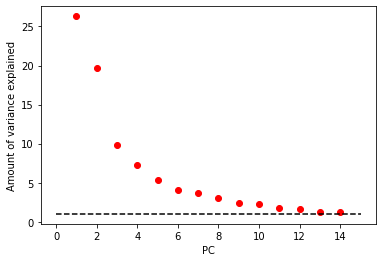

(70, 14)


In [41]:
# {{NO LUX}}
from sklearn.decomposition import PCA

c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train.shape)

In [42]:
# {{NO LUX}}
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [43]:
# {{NO LUX}}
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.372 (+/- 0.502)
SVR: 0.022 (+/- 0.458)
DTR: -0.492 (+/- 0.797)
RFR (100 Trees): 0.159 (+/- 0.483)


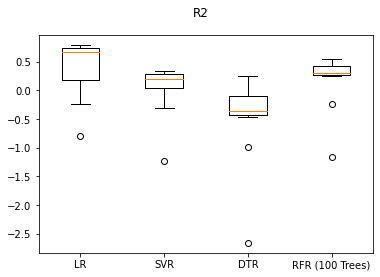

In [44]:
# {{NO LUX}}
myplot(X_train, y_train)

In [45]:
# {{NO LUX}}
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

#model = LinearRegression(fit_intercept=True)
model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.7853
MSE: 0.0112
MAE: 0.0712
rms: 0.1194


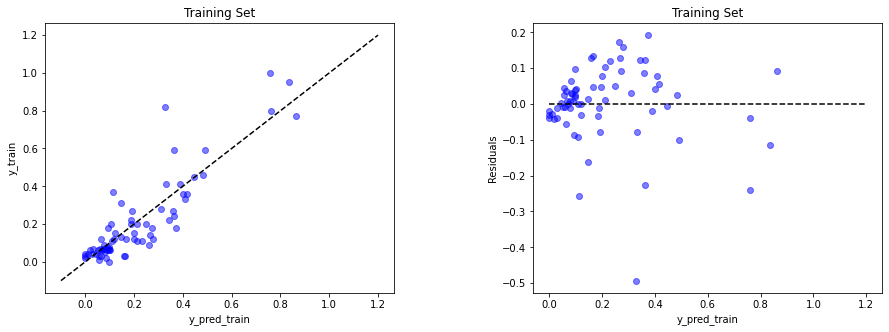

In [46]:
# {{NO LUX}}
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.3675
MSE: 0.0228
MAE: 0.1051
rms: 0.2134


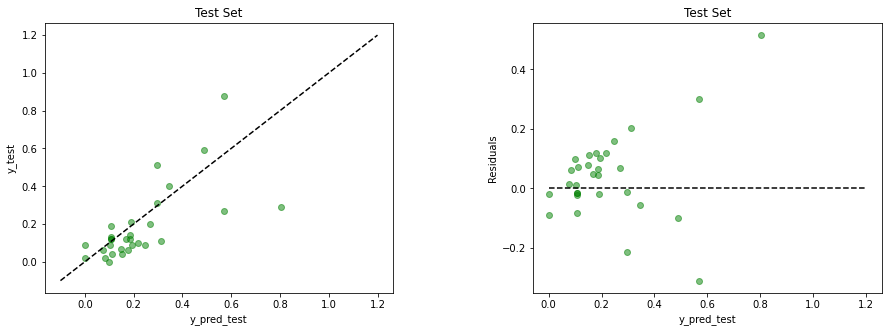

In [47]:
# {{NO LUX}}
y_pred_test = model.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

In [48]:
# {{NO LUX}}
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.7853
MSE: 0.0112
MAE: 0.0712
rms: 0.1194


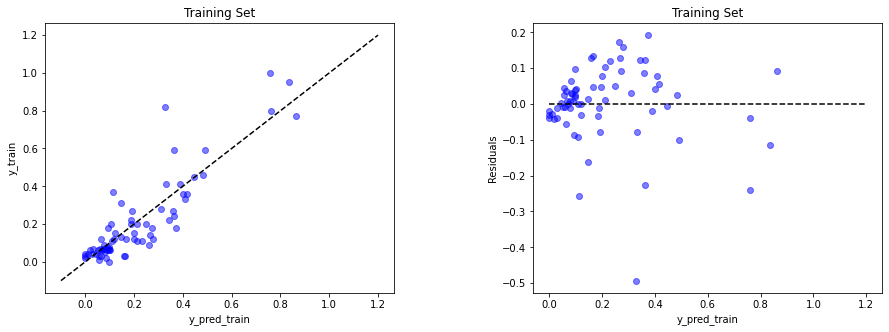

In [49]:
# {{NO LUX}}
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()